# Preprocesamiento y exploración de datos

## Importacíon de librerías

In [285]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys
import os
from pathlib import Path
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder


In [286]:
project_root = Path(os.getcwd()).parent
sys.path.append(str(project_root))

In [287]:
# Funciones
from functions.f01_preprocesing_functions import df_explore
from functions.f01_preprocesing_functions import df_ValuesCheck

## Exploración de datos

In [288]:
contract = pd.read_csv(project_root/'datasets/contract.csv')
personal = pd.read_csv(project_root/'datasets/personal.csv')
internet = pd.read_csv(project_root/'datasets/internet.csv')
phone = pd.read_csv(project_root/'datasets/phone.csv')

In [289]:
df_explore(contract)

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB

Primeras filas del DataFrame:
   customerID   BeginDate              EndDate            Type  \
0  7590-VHVEG  2020-01-01                   No  Month-to-month   
1  5575-GNVDE  2017-04-01                   No        One year   
2  3668-QPYBK  2019-10-01  2019-12-01 00:00:00  Month-to-month   
3  7795-CFOCW  2016-05-01                   No  

In [290]:
df_explore(personal)

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB

Primeras filas del DataFrame:
   customerID  gender  SeniorCitizen Partner Dependents
0  7590-VHVEG  Female              0     Yes         No
1  5575-GNVDE    Male              0      No         No
2  3668-QPYBK    Male              0      No         No
3  7795-CFOCW    Male              0      No         No
4  9237-HQITU  Female              0      No         No

Descripción estadística:
        customerID gender  SeniorCitizen Partner Dependents
count         7043   7043    7043.000000    7043       7043
u

In [291]:
df_explore(internet)

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB

Primeras filas del DataFrame:
   customerID InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0  7590-VHVEG             DSL             No          Yes               No   
1  5575-GNVDE             DSL            Yes           No              Yes   
2  3668-QPYBK             DSL            Yes          Yes               No   
3  7795-CFOCW         

In [292]:
df_explore(phone)

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB

Primeras filas del DataFrame:
   customerID MultipleLines
0  5575-GNVDE            No
1  3668-QPYBK            No
2  9237-HQITU            No
3  9305-CDSKC           Yes
4  1452-KIOVK           Yes

Descripción estadística:
        customerID MultipleLines
count         6361          6361
unique        6361             2
top     5575-GNVDE            No
freq             1          3390


## Revisión de datos

### contract DF

In [293]:
df_ValuesCheck(contract)

Columnas con valores ausentes: customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

Filas totalmente duplicadas: 0

Duplicados en columna customerID: 0


In [294]:
print(contract[contract['TotalCharges'] == " "])

      customerID   BeginDate EndDate      Type PaperlessBilling  \
488   4472-LVYGI  2020-02-01      No  Two year              Yes   
753   3115-CZMZD  2020-02-01      No  Two year               No   
936   5709-LVOEQ  2020-02-01      No  Two year               No   
1082  4367-NUYAO  2020-02-01      No  Two year               No   
1340  1371-DWPAZ  2020-02-01      No  Two year               No   
3331  7644-OMVMY  2020-02-01      No  Two year               No   
3826  3213-VVOLG  2020-02-01      No  Two year               No   
4380  2520-SGTTA  2020-02-01      No  Two year               No   
5218  2923-ARZLG  2020-02-01      No  One year              Yes   
6670  4075-WKNIU  2020-02-01      No  Two year               No   
6754  2775-SEFEE  2020-02-01      No  Two year              Yes   

                  PaymentMethod  MonthlyCharges TotalCharges  
488   Bank transfer (automatic)           52.55               
753                Mailed check           20.25               
936   

In [295]:
contract['Churn'] = np.where(contract['EndDate'] == 'No', 0, 1)

In [296]:
contract['EndDate'] = pd.to_datetime(contract['EndDate'], errors='coerce')
contract['BeginDate'] = pd.to_datetime(contract['BeginDate'], errors='coerce')
contract['TotalCharges'] = pd.to_numeric(contract['TotalCharges'], errors='coerce')

/var/folders/p5/ktpmth0j3514y8d1c9x8sd_00000gn/T/ipykernel_66000/2339174794.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  contract['EndDate'] = pd.to_datetime(contract['EndDate'], errors='coerce')


In [297]:
print(contract['BeginDate'].max())

2020-02-01 00:00:00


In [298]:
LastDate = pd.to_datetime('2020-02-01')

contract['PlanDurationMonths'] = ((contract['EndDate']-contract['BeginDate']).dt.days)/30
contract.loc[contract['EndDate'].isna(), 'PlanDurationMonths'] = ((LastDate - contract['BeginDate']).dt.days)/30
contract['PlanDurationMonths'] = np.round(contract['PlanDurationMonths']).astype('Int64')

In [299]:
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,PlanDurationMonths
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,29.85,0,1
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,1889.50,0,35
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,1,2
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1840.75,0,46
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,1,2


In [300]:
print(contract['Churn'].value_counts(dropna=False).sort_index())

Churn
0    5174
1    1869
Name: count, dtype: int64


In [301]:
mask = contract['TotalCharges'].isna()
contract.loc[mask, 'TotalCharges'] = contract.loc[mask, 'MonthlyCharges'] * contract.loc[mask, 'PlanDurationMonths']

In [302]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   customerID          7043 non-null   object        
 1   BeginDate           7043 non-null   datetime64[ns]
 2   EndDate             1869 non-null   datetime64[ns]
 3   Type                7043 non-null   object        
 4   PaperlessBilling    7043 non-null   object        
 5   PaymentMethod       7043 non-null   object        
 6   MonthlyCharges      7043 non-null   float64       
 7   TotalCharges        7043 non-null   float64       
 8   Churn               7043 non-null   int64         
 9   PlanDurationMonths  7043 non-null   Int64         
dtypes: Int64(1), datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 557.2+ KB


In [303]:
contract = contract.drop(['PaperlessBilling','PaymentMethod'],axis=1)

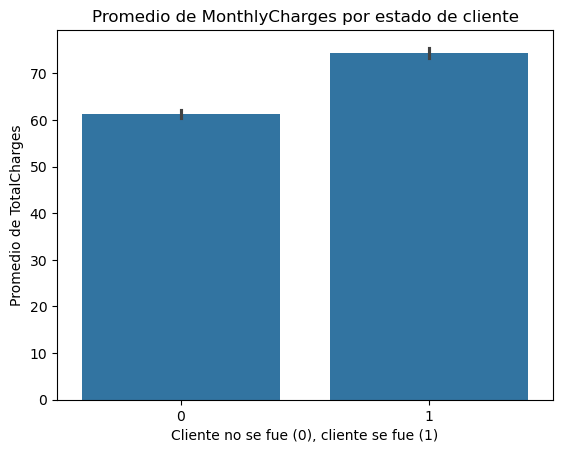

In [304]:
# Gráfico
sns.barplot(x='Churn', y='MonthlyCharges', data=contract)
plt.title('Promedio de MonthlyCharges por estado de cliente')
plt.xlabel('Cliente no se fue (0), cliente se fue (1)')
plt.ylabel('Promedio de TotalCharges')
plt.show()

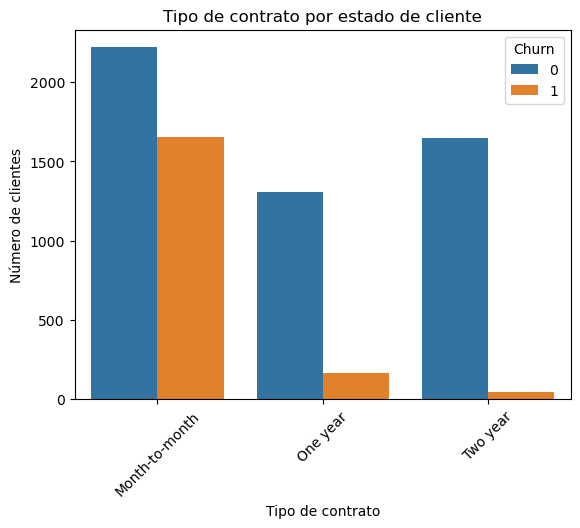

In [305]:
sns.countplot(x='Type', hue='Churn', data=contract)
plt.title('Tipo de contrato por estado de cliente')
plt.xlabel('Tipo de contrato')
plt.ylabel('Número de clientes')
plt.xticks(rotation=45)
plt.show()


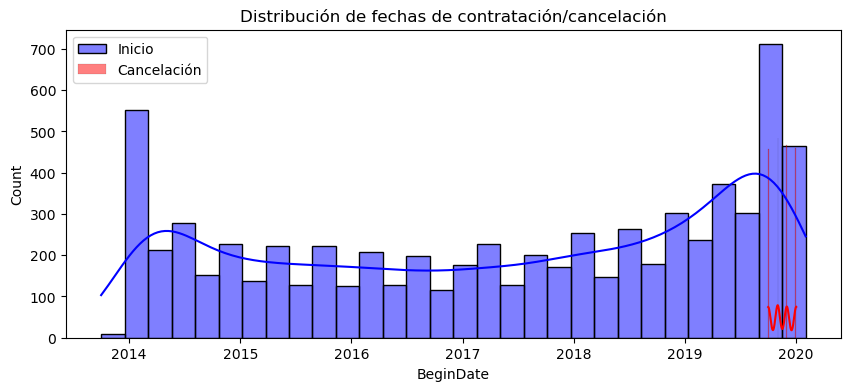

In [306]:
plt.figure(figsize=(10, 4))
sns.histplot(contract['BeginDate'], bins=30, kde=True, color='blue', label='Inicio')
sns.histplot(contract['EndDate'].dropna(), bins=30, kde=True, color='red', label='Cancelación')
plt.title("Distribución de fechas de contratación/cancelación")
plt.legend()
plt.show()

### personal DF

In [307]:
df_ValuesCheck(personal)

Columnas con valores ausentes: customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

Filas totalmente duplicadas: 0

Duplicados en columna customerID: 0


### internet

In [308]:
df_ValuesCheck(internet)

Columnas con valores ausentes: customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

Filas totalmente duplicadas: 0

Duplicados en columna customerID: 0


### phone

In [309]:
df_ValuesCheck(phone)

Columnas con valores ausentes: customerID       0
MultipleLines    0
dtype: int64

Filas totalmente duplicadas: 0

Duplicados en columna customerID: 0


cambiar tipo de datos de fechas
eliminar columna paperlessbilling y paymentmethod

Eliminación de atributos innecesarios y datos irrelevantes, corrección de valores ausentes y filas duplicadas.

## Enriquecimiento de datos

In [310]:
df = contract.merge(personal, on='customerID', how='left')
df = df.merge(internet,on='customerID', how = 'left')
df = df.merge(phone, on='customerID', how = 'left')

In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   customerID          7043 non-null   object        
 1   BeginDate           7043 non-null   datetime64[ns]
 2   EndDate             1869 non-null   datetime64[ns]
 3   Type                7043 non-null   object        
 4   MonthlyCharges      7043 non-null   float64       
 5   TotalCharges        7043 non-null   float64       
 6   Churn               7043 non-null   int64         
 7   PlanDurationMonths  7043 non-null   Int64         
 8   gender              7043 non-null   object        
 9   SeniorCitizen       7043 non-null   int64         
 10  Partner             7043 non-null   object        
 11  Dependents          7043 non-null   object        
 12  InternetService     5517 non-null   object        
 13  OnlineSecurity      5517 non-null   object      

In [312]:
columns_to_fill = ['MultipleLines','OnlineSecurity','DeviceProtection','OnlineBackup','TechSupport','StreamingTV','StreamingMovies']
df[columns_to_fill] = df[columns_to_fill].fillna('No')

In [313]:
df = df.drop(['customerID','BeginDate','EndDate','gender'], axis=1)

In [314]:
# Copia del dataframe para no modificar el original
df_encoded = df.copy()

# Columnas nominales (sin orden intrínseco)
nominal_cols = [
    'Partner',
    'Dependents',
    'InternetService',
    'MultipleLines'
]

# Inicializar el OneHotEncoder
ohe = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' para evitar multicolinealidad

# Aplicar OHE
ohe_result = ohe.fit_transform(df_encoded[nominal_cols])

# Crear nombres para las nuevas columnas
ohe_columns = []
for i, col in enumerate(nominal_cols):
    for cat in ohe.categories_[i][1:]:  # Saltamos la primera categoría por drop='first'
        ohe_columns.append(f"{col}_{cat}")

# Convertir a DataFrame
ohe_df = pd.DataFrame(ohe_result, columns=ohe_columns, index=df_encoded.index)

# Concatenar con el dataframe original
df_encoded = pd.concat([df_encoded, ohe_df], axis=1)

# Eliminar las columnas originales
df_encoded.drop(nominal_cols, axis=1, inplace=True)

In [315]:
# Columnas ordinales (con orden intrínseco)
ordinal_cols = {
    'Type': ['Month-to-month', 'One year', 'Two year']  # De menor a mayor duración
}

# Inicializar el OrdinalEncoder con categorías definidas
ordinal_encoder = OrdinalEncoder(categories=[ordinal_cols['Type']])

# Aplicar Ordinal Encoding solo a la columna 'Type'
df_encoded['Type_encoded'] = ordinal_encoder.fit_transform(df_encoded[['Type']])

# Eliminar la columna original
df_encoded.drop('Type', axis=1, inplace=True)

In [316]:
# Para servicios con respuestas Yes/No
binary_cols = [
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies'
]

# Mapear a valores binarios (Yes=1, No=0)
for col in binary_cols:
    df_encoded[f"{col}_bin"] = df_encoded[col].map({'Yes': 1, 'No': 0})
    
# Eliminar columnas originales
df_encoded.drop(binary_cols, axis=1, inplace=True)

In [317]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   MonthlyCharges               7043 non-null   float64
 1   TotalCharges                 7043 non-null   float64
 2   Churn                        7043 non-null   int64  
 3   PlanDurationMonths           7043 non-null   Int64  
 4   SeniorCitizen                7043 non-null   int64  
 5   Partner_Yes                  7043 non-null   float64
 6   Dependents_Yes               7043 non-null   float64
 7   InternetService_Fiber optic  7043 non-null   float64
 8   InternetService_nan          7043 non-null   float64
 9   MultipleLines_Yes            7043 non-null   float64
 10  Type_encoded                 7043 non-null   float64
 11  OnlineSecurity_bin           7043 non-null   int64  
 12  OnlineBackup_bin             7043 non-null   int64  
 13  DeviceProtection_b

In [318]:
df_encoded

,MonthlyCharges,TotalCharges,Churn,PlanDurationMonths,SeniorCitizen,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_nan,MultipleLines_Yes,Type_encoded,OnlineSecurity_bin,OnlineBackup_bin,DeviceProtection_bin,TechSupport_bin,StreamingTV_bin,StreamingMovies_bin
0,29.85,29.85,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0
1,56.95,1889.50,0,35,0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1,0,0,0
2,53.85,108.15,1,2,0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0
3,42.30,1840.75,0,46,0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1,1,0,0
4,70.70,151.65,1,2,0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,84.80,1990.50,0,24,0,1.0,1.0,0.0,0.0,1.0,1.0,1,0,1,1,1,1
7039,103.20,7362.90,0,73,0,1.0,1.0,1.0,0.0,1.0,1.0,0,1,1,0,1,1
7040,29.60,346.45,0,11,0,1.0,1.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0
7041,74.40,306.60,1,4,1,1.0,0.0,1.0,0.0,1.0,0.0,0,0,0,0,0,0


In [320]:
df_encoded.describe()

,MonthlyCharges,TotalCharges,Churn,PlanDurationMonths,SeniorCitizen,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_nan,MultipleLines_Yes,Type_encoded,OnlineSecurity_bin,OnlineBackup_bin,DeviceProtection_bin,TechSupport_bin,StreamingTV_bin,StreamingMovies_bin
count,7043.000000,7043.000000,7043.000000,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,64.761692,2279.734304,0.265370,32.83118,0.162147,0.483033,0.299588,0.439585,0.216669,0.421837,0.690473,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903
std,30.090047,2266.794470,0.441561,25.004181,0.368612,0.499748,0.458110,0.496372,0.412004,0.493888,0.833755,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307
min,18.250000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.500000,398.550000,0.000000,9.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,70.350000,1394.550000,0.000000,29.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,89.850000,3786.600000,1.000000,56.0,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,118.750000,8684.800000,1.000000,73.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Validación de datos

In [321]:
# ====================
# VALIDACIÓN DE DATOS
# ====================
print("\nValidando transformaciones de datos...")

# Verificar que no hay valores nulos en el dataset final
print("\nValores nulos por columna:")
print(df_encoded.isnull().sum())

# Verificar que el encoding se aplicó correctamente
print("\nVerificación de encoding:")
print("Variables nominales originales:", nominal_cols)
print("Nuevas columnas creadas:", ohe_columns)
print("Variable ordinal 'Type' convertida a 'Type_encoded'")

# Verificar rangos de valores numéricos
print("\nEstadísticas descriptivas:")
print(df_encoded.describe())


Validando transformaciones de datos...

Valores nulos por columna:
MonthlyCharges                 0
TotalCharges                   0
Churn                          0
PlanDurationMonths             0
SeniorCitizen                  0
Partner_Yes                    0
Dependents_Yes                 0
InternetService_Fiber optic    0
InternetService_nan            0
MultipleLines_Yes              0
Type_encoded                   0
OnlineSecurity_bin             0
OnlineBackup_bin               0
DeviceProtection_bin           0
TechSupport_bin                0
StreamingTV_bin                0
StreamingMovies_bin            0
dtype: int64

Verificación de encoding:
Variables nominales originales: ['Partner', 'Dependents', 'InternetService', 'MultipleLines']
Nuevas columnas creadas: ['Partner_Yes', 'Dependents_Yes', 'InternetService_Fiber optic', 'InternetService_nan', 'MultipleLines_Yes']
Variable ordinal 'Type' convertida a 'Type_encoded'

Estadísticas descriptivas:
       MonthlyCharges  

### Balanceo de clases


Analizando balance de clases (Churn):

Distribución de Churn:
Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64


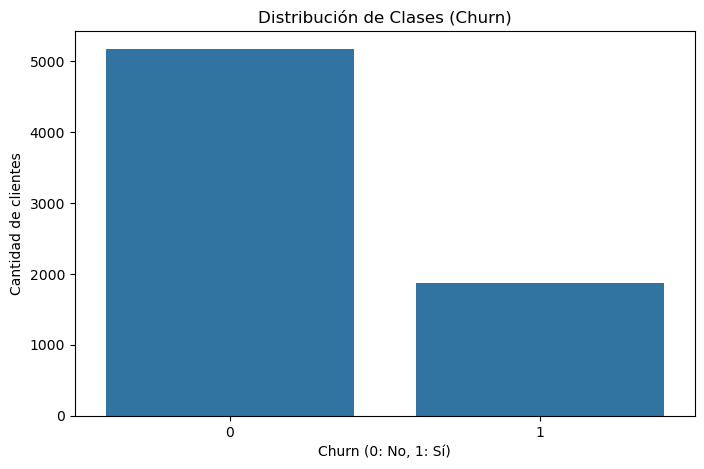


Porcentaje de clientes que hicieron churn: 26.54%


In [322]:
# ====================
# ANÁLISIS DE BALANCE DE CLASES
# ====================
print("\nAnalizando balance de clases (Churn):")

# Distribución de la variable target
churn_dist = df_encoded['Churn'].value_counts(normalize=True) * 100
print(f"\nDistribución de Churn:\n{churn_dist}")

# Visualización
plt.figure(figsize=(8, 5))
sns.countplot(x='Churn', data=df_encoded)
plt.title('Distribución de Clases (Churn)')
plt.xlabel('Churn (0: No, 1: Sí)')
plt.ylabel('Cantidad de clientes')
plt.show()

# Opcional: Guardar el porcentaje de churn para referencia
churn_percentage = churn_dist[1]
print(f"\nPorcentaje de clientes que hicieron churn: {churn_percentage:.2f}%")

### Análisis de correlación


Calculando matriz de correlación...


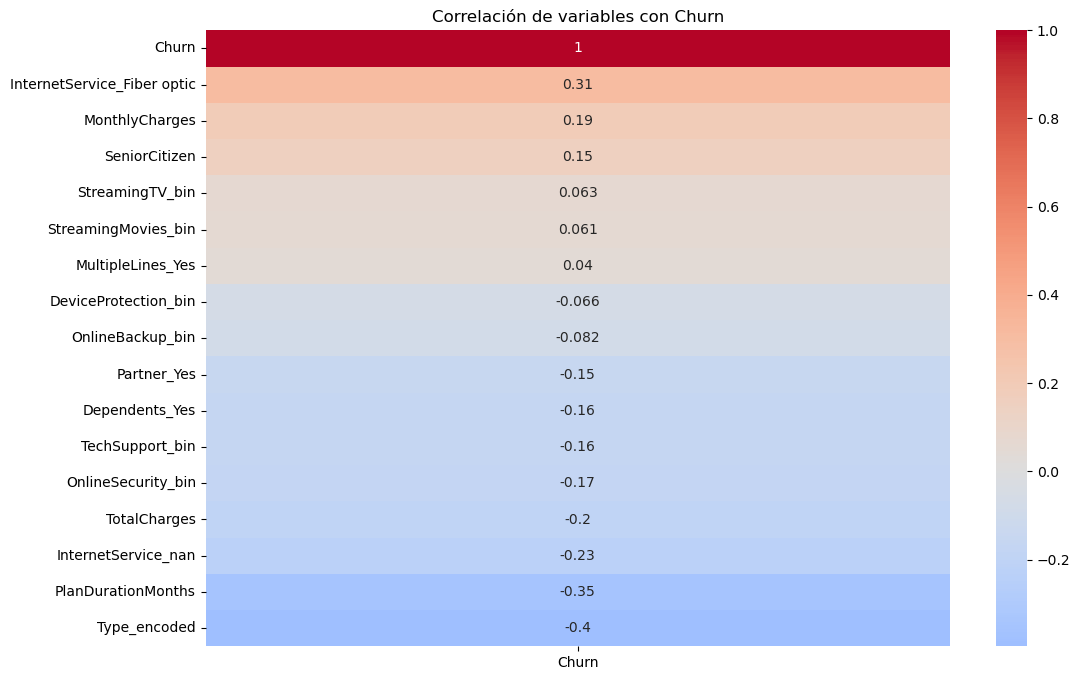

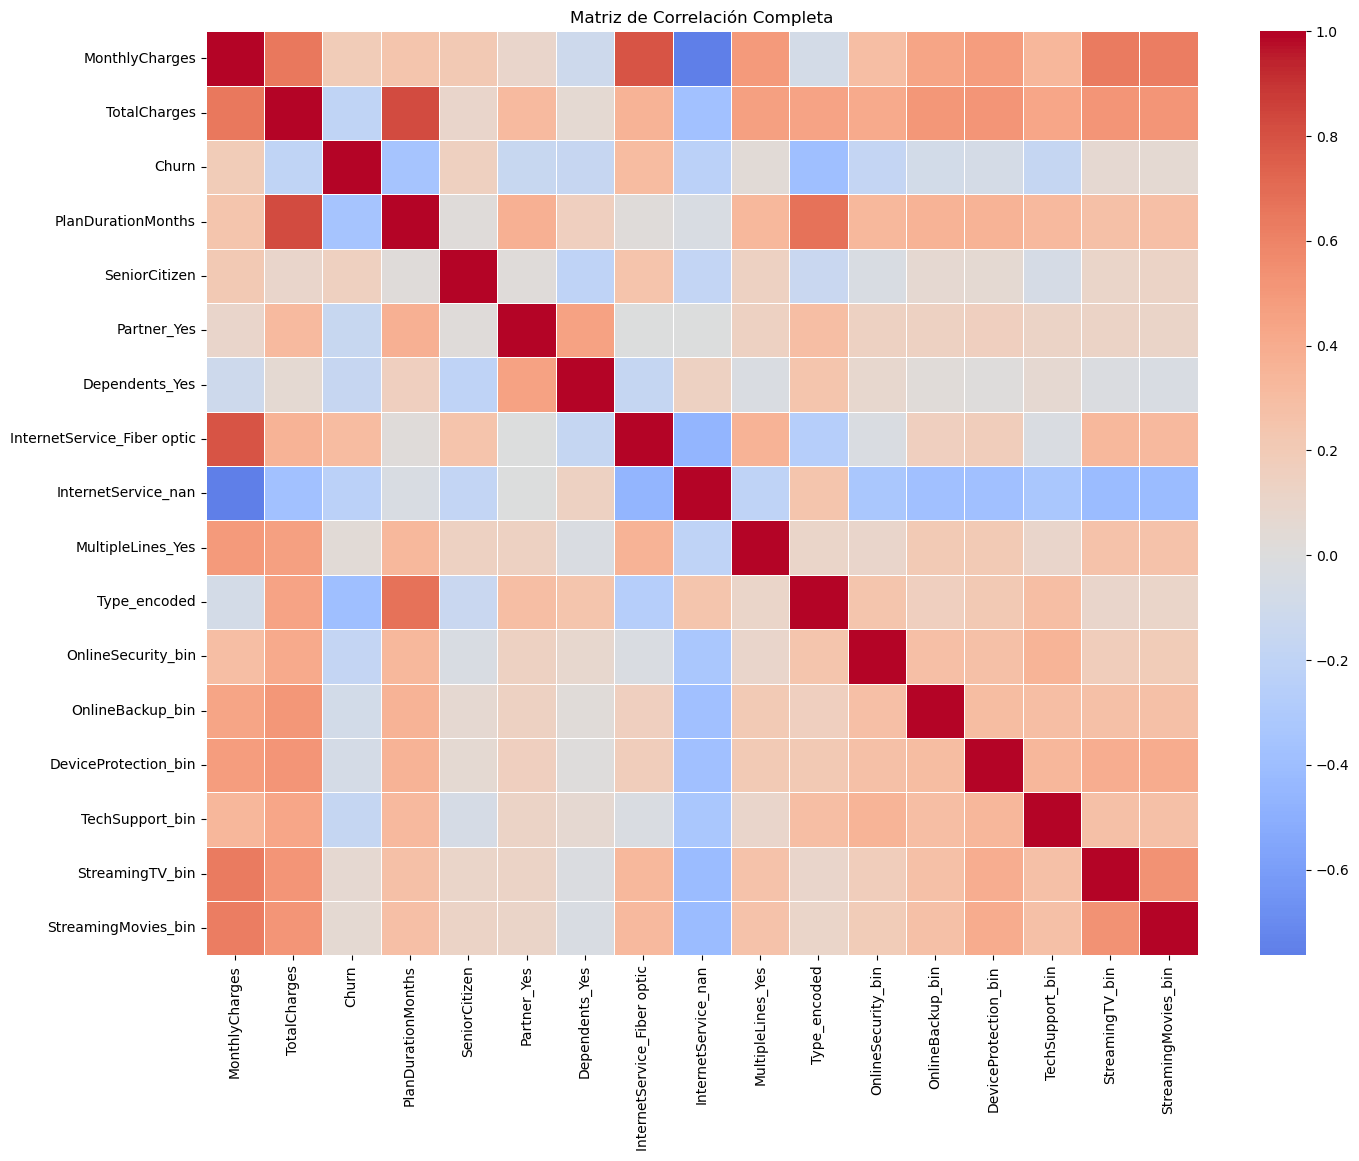

In [323]:
# ====================
# MATRIZ DE CORRELACIÓN
# ====================
print("\nCalculando matriz de correlación...")

# Calcular matriz de correlación
corr_matrix = df_encoded.corr()

# Visualizar matriz de correlación con Churn
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix[['Churn']].sort_values(by='Churn', ascending=False), 
            annot=True, cmap='coolwarm', center=0)
plt.title('Correlación de variables con Churn')
plt.show()

# Visualizar matriz completa (puede ser grande)
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, 
            fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación Completa')
plt.show()

In [324]:
# ====================
# FEATURE ENGINEERING ADICIONAL
# ====================
print("\nCreando características adicionales...")

# Ratio TotalCharges/MonthlyCharges
df_encoded['ChargeRatio'] = df_encoded['TotalCharges'] / df_encoded['MonthlyCharges']
df_encoded['ChargeRatio'] = df_encoded['ChargeRatio'].replace([np.inf, -np.inf], np.nan).fillna(0)

# Cantidad de servicios adicionales contratados
services = ['OnlineSecurity_bin', 'OnlineBackup_bin', 'DeviceProtection_bin',
            'TechSupport_bin', 'StreamingTV_bin', 'StreamingMovies_bin']
df_encoded['TotalServices'] = df_encoded[services].sum(axis=1)

# Cliente de larga duración (más de 24 meses)
df_encoded['LongTermCustomer'] = (df_encoded['PlanDurationMonths'] > 24).astype(int)

# Verificar nuevas características
print("\nNuevas características creadas:")
print("- ChargeRatio: Ratio TotalCharges/MonthlyCharges")
print("- TotalServices: Cantidad de servicios adicionales contratados")
print("- LongTermCustomer: Indicador de cliente de larga duración (>24 meses)")


Creando características adicionales...

Nuevas características creadas:
- ChargeRatio: Ratio TotalCharges/MonthlyCharges
- TotalServices: Cantidad de servicios adicionales contratados
- LongTermCustomer: Indicador de cliente de larga duración (>24 meses)


In [327]:
# ====================
# NORMALIZACIÓN DE VARIABLES
# ====================
from sklearn.preprocessing import StandardScaler

print("\nNormalizando variables numéricas...")

# Identificar columnas numéricas (excluyendo variables binarias y Churn)
numeric_cols = ['MonthlyCharges', 'TotalCharges', 'PlanDurationMonths', 
                'ChargeRatio', 'TotalServices']

print("\nEstadísticas antes de normalización:")
print(df_encoded[numeric_cols].describe().loc[['mean', 'std']])


# Aplicar StandardScaler
scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

# Verificar normalización
print("\nEstadísticas después de normalización:")
print(df_encoded[numeric_cols].describe().loc[['mean', 'std']])


Normalizando variables numéricas...

Estadísticas antes de normalización:
      MonthlyCharges  TotalCharges  PlanDurationMonths   ChargeRatio  \
mean   -1.866398e-17 -1.715068e-17       -3.278807e-17 -2.017727e-18   
std     1.000071e+00  1.000071e+00        1.000071e+00  1.000071e+00   

      TotalServices  
mean   1.967284e-17  
std    1.000071e+00  

Estadísticas después de normalización:
      MonthlyCharges  TotalCharges  PlanDurationMonths   ChargeRatio  \
mean   -1.664625e-17 -1.311523e-17       -2.421273e-17 -2.017727e-18   
std     1.000071e+00  1.000071e+00        1.000071e+00  1.000071e+00   

      TotalServices  
mean   1.967284e-17  
std    1.000071e+00  


In [328]:
# ====================
# GUARDADO FINAL
# ====================
print("\nGuardando dataset final con nuevas características...")

# Guardar versión con nuevas características
df_encoded.to_feather(f'{project_root}/datasets/dataframe_enriched.feather')

# Opcional: Guardar también una versión CSV
df_encoded.to_csv(f'{project_root}/datasets/dataframe_enriched.csv', index=False)

print("""
Proceso completado exitosamente!
Dataset guardado con:
- Validación de datos
- Análisis de balance de clases
- Nuevas características de ingeniería
- Variables numéricas normalizadas
""")


Guardando dataset final con nuevas características...

Proceso completado exitosamente!
Dataset guardado con:
- Validación de datos
- Análisis de balance de clases
- Nuevas características de ingeniería
- Variables numéricas normalizadas

